## Sellmeier's equation:

It is usual to model the dispersion of transparent optical materials with Sellmeier's equation:

$$
n^2(\lambda) = 1 + \sum_{k=1}^{m}{\frac{A_k \lambda^2}{\lambda^2 - B_k}},
$$

where we are modeling $m$ independent resonances. Writing this equation in terms of $\omega$ we get:

$$
n^2(\omega) = 1 + \sum_{k=1}^{m}{\frac{\omega_k^2}{\omega_k^2 - \omega^2} \chi_k^{(1)}},
$$

with:

$$
\chi_k^{(1)} = A_k \\
\omega_k = \frac{2\pi c}{\sqrt {B_k}}.
$$

Each one of these equations is a solution of Lorentz Equation:

$$
\frac{d^2P(t)}{dt^2} + \omega_k^2 P(t) = \epsilon_0 \omega_k^2 \, \chi_k^{(1)} E(t).
$$

In this notebook we display the refractive index of the main materials we are interested in using published models based on the Sellmeier equation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.constants import c,pi,mu_0,epsilon_0

from materials import * #Don't do this

#Larger font for plots
plt.rcParams.update({'font.size': 15})

## Wavelength Range

In [2]:
#Wavelength range
wl_start = 0.3
wl_stop = 5.0
wl_step = 0.1
wl = np.arange(wl_start, wl_stop+wl_step, wl_step)

## Congruently grown LN with 5-mol% MgO

(400.0, 600.0, 0.05, 0.1)

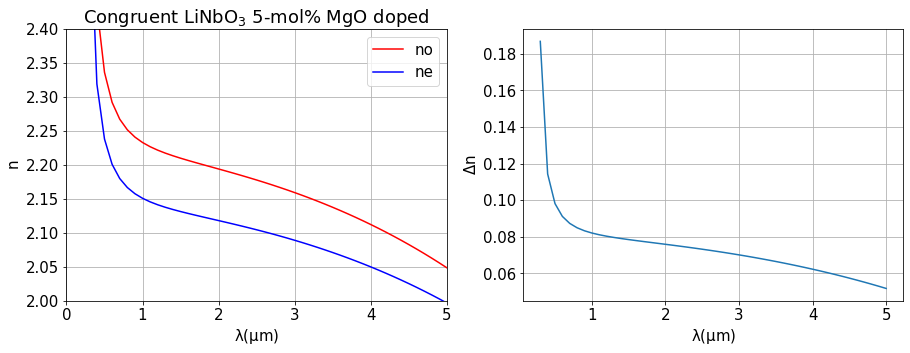

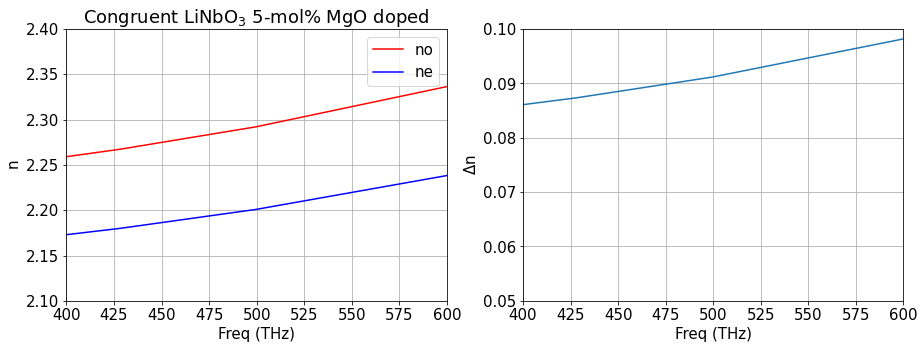

In [3]:
no_LN_doped = refractive_index('LN_MgO_o', wl)
ne_LN_doped = refractive_index('LN_MgO_e', wl)

delta_n = no_LN_doped - ne_LN_doped

plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(wl, no_LN_doped, 'r')
ax1.plot(wl, ne_LN_doped, 'b')
ax1.legend(['no','ne'])
ax1.axis([0, wl_stop, 2, 2.4])
ax1.set_xlabel('$\mathrm{\lambda (\mu m)}$')
ax1.set_ylabel('$\mathrm{n}$')
ax1.grid(True)
ax1.set_title('Congruent $\mathrm{LiNbO_3}$ 5-mol% MgO doped')

ax2.plot(wl, delta_n)
ax2.grid(True)
ax2.set_xlabel('$\mathrm{\lambda (\mu m)}$')
ax2.set_ylabel('$\Delta \mathrm{n}$')

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(c/(wl*1e-6)*1e-12, no_LN_doped, 'r')
ax1.plot(c/(wl*1e-6)*1e-12, ne_LN_doped, 'b')
ax1.legend(['no','ne'])
# ax1.axis([0, wl_stop, 2, 2.4])
ax1.set_xlabel('Freq (THz)')
ax1.set_ylabel('$\mathrm{n}$')
ax1.grid(True)
ax1.set_title('Congruent $\mathrm{LiNbO_3}$ 5-mol% MgO doped')
ax1.axis([400, 600, 2.1, 2.4])

ax2.plot(c/(wl*1e-6)*1e-12, delta_n)
ax2.grid(True)
ax2.set_xlabel('Freq (THz)')
ax2.set_ylabel('$\Delta \mathrm{n}$')
ax2.axis([400, 600, 0.05,0.1])

## Congruently grown LN (undoped)

Text(0.5, 1.0, 'Congruently grown $\\mathrm{LiNbO_3}$ (undoped)')

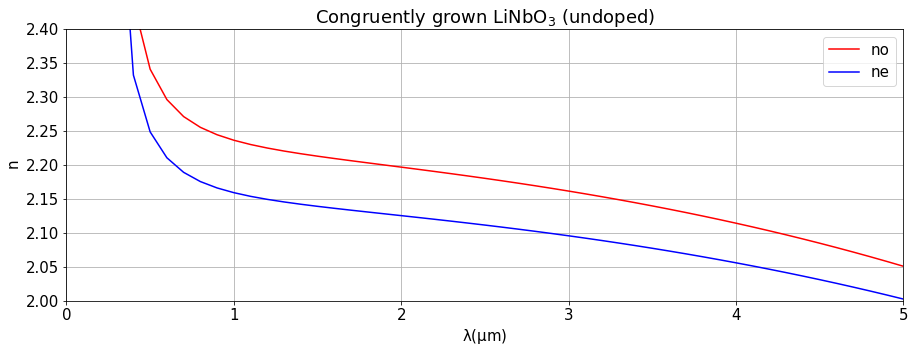

In [4]:
no_LN_undoped = refractive_index('LN_o', wl)
ne_LN_undoped = refractive_index('LN_e', wl)

plt.plot(wl, no_LN_undoped, 'r')
plt.plot(wl, ne_LN_undoped, 'b')
plt.legend(['no','ne'])
plt.axis([0, wl_stop, 2, 2.4])
plt.xlabel('$\mathrm{\lambda (\mu m)}$')
plt.ylabel('$\mathrm{n}$')
plt.grid()
plt.title('Congruently grown $\mathrm{LiNbO_3}$ (undoped)')

## Silicon (SiO$_2$)

Text(0.5, 1.0, 'Sapphire ($\\mathrm{Al_2O_3}$)')

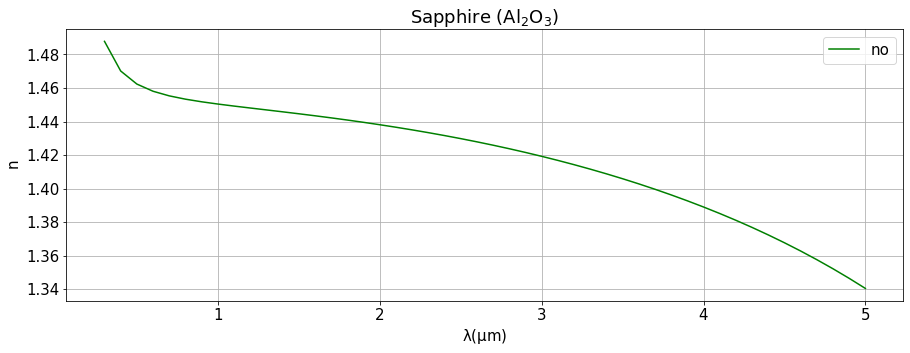

In [5]:
no_Sa = refractive_index('SiO2', wl)

plt.plot(wl, no_Sa, 'g')
#plt.plot(wl, ne_Sa, 'b')
plt.legend(['no'])
# plt.axis([0, 5, 1.5, 1.9])
plt.xlabel('$\mathrm{\lambda (\mu m)}$')
plt.ylabel('$\mathrm{n}$')
plt.grid()
plt.title('Sapphire ($\mathrm{Al_2O_3}$)')

## Sapphire (Al$_2$O$_3$)

Note: Sapphire is slightly annisotropic. I'll add the extraordinary index soon.

Text(0.5, 1.0, 'Sapphire ($\\mathrm{Al_2O_3}$)')

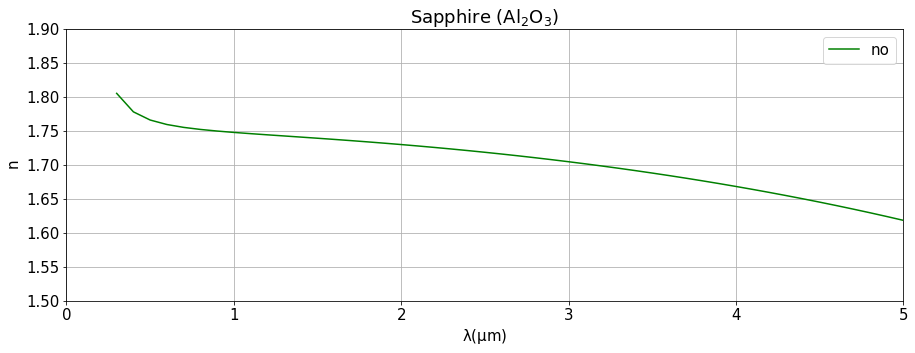

In [6]:
no_Sa = refractive_index('Sapphire', wl)

plt.plot(wl, no_Sa, 'g')
#plt.plot(wl, ne_Sa, 'b')
plt.legend(['no'])
plt.axis([0, 5, 1.5, 1.9])
plt.xlabel('$\mathrm{\lambda (\mu m)}$')
plt.ylabel('$\mathrm{n}$')
plt.grid()
plt.title('Sapphire ($\mathrm{Al_2O_3}$)')

## All materials

Text(0.5, 1.0, 'Congruently grown $\\mathrm{LiNbO_3}$ doped with 5-mol% MgO')

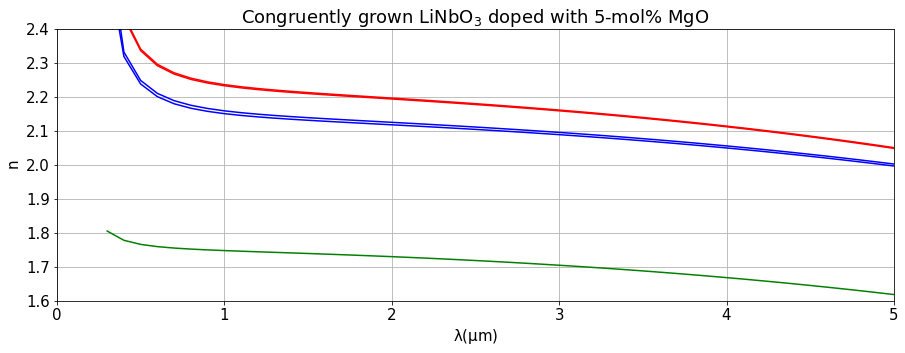

In [7]:
plt.plot(wl, no_LN_doped, 'r')
plt.plot(wl, ne_LN_doped, 'b')
plt.plot(wl, no_LN_undoped, 'r')
plt.plot(wl, ne_LN_undoped, 'b')
plt.plot(wl, no_Sa, 'g')

plt.axis([0, wl_stop, 1.6, 2.4])
plt.xlabel('$\mathrm{\lambda (\mu m)}$')
plt.ylabel('$\mathrm{n}$')
plt.grid()
plt.title('Congruently grown $\mathrm{LiNbO_3}$ doped with 5-mol% MgO')

## References:
[1]D. E. Zelmon, D. L. Small, and D. Jundt, “Infrared corrected Sellmeier coefficients for congruently grown lithium niobate and 5 mol% magnesium oxide –doped lithium niobate,” J. Opt. Soc. Am. B, vol. 14, no. 12, p. 3319, Dec. 1997.

[2]I. H. Malitson, “Refraction and Dispersion of Synthetic Sapphire,” J. Opt. Soc. Am., JOSA, vol. 52, no. 12, pp. 1377–1379, Dec. 1962.
